In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('/content/Google_Stock_Price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
data = df[['Close']].values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [4]:
data.shape

(3272, 1)

In [5]:
# Normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create Sequences
def create_sequences(data, seq_length):
  x,y = [],[]
  for i in range(seq_length, len(data)):
    x.append(data[i-seq_length:i, 0])
    y.append(data[i,0])
  return np.array(x), np.array(y)

sequence_length = 60
x, y = create_sequences(scaled_data, sequence_length)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [6]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x.shape[1], 1)),
    LSTM(50),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(x_train, y_train, epochs=8, batch_size=32, validation_split = 0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 0.0922 - val_loss: 0.0145
Epoch 2/8
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0112 - val_loss: 0.0113
Epoch 3/8
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 4/8
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0108 - val_loss: 0.0114
Epoch 5/8
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 6/8
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0099 - val_loss: 0.0102
Epoch 7/8
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0098 - val_loss: 0.0138
Epoch 8/8
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0108 - val_loss: 0.0116


In [7]:
y_pred = model.predict(x_test)
# y_pred = scaler.inverse_transform(prediction.reshape(-1, 1))
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
mean_absolute_error(y_test, y_pred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


0.009548363008958944

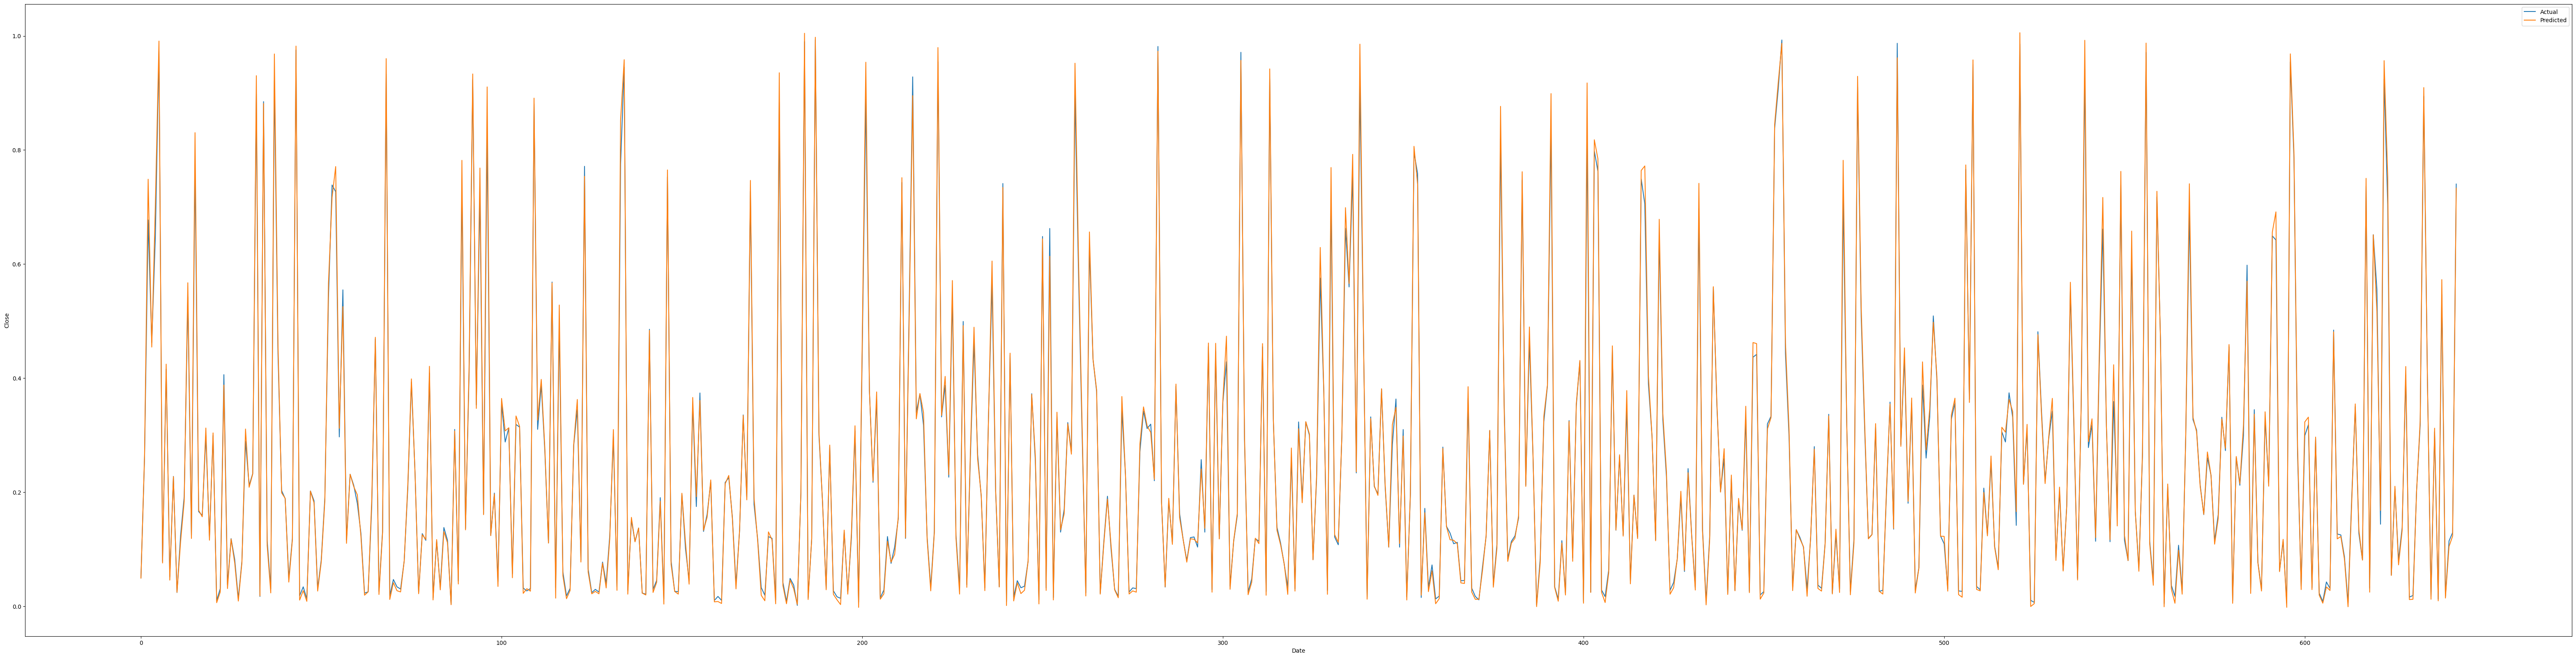

In [8]:
plt.figure(figsize=(80,20))
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

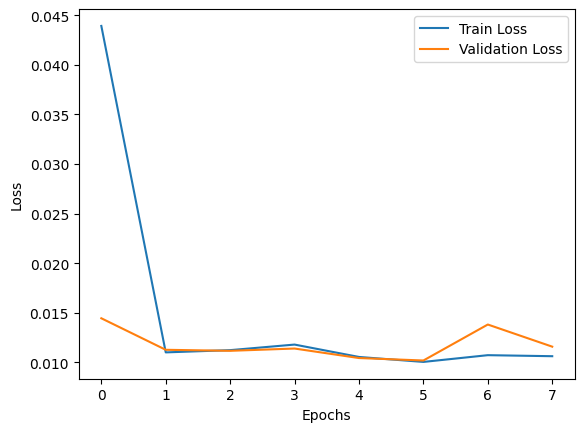

In [9]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()